<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-3/bozzato_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Iterative methods**
**Bozzato Federico**

# **Abstract**

In this lab we deepen the problem of solving systems of equations, both linear and nonlinear. There will be presented three methods for solving systems of linear equations, one for solving nonlinear equations and another method for systems of nonlinear equations.

#**About the code**

**Author:** Federico Bozzato

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import sys
import math
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

# **Introduction**

Iterative methods differ from direct methods because they do not need a specific number of steps to complete as the direct methods need [1]. The way the iterative methods operate is to reduce the approximation error in each iteration, but they need a convergence criterion in order to stop when a certain condition is reached.

This report is divided into three parts:

1. Methods: in this section, each algorithm is presented and explained, giving also the mathematic definition of the operation the algorithm implements.

2. Results: in this section, the results of each algorithm are presented.

3. Discussion: in this last section, results are discussed.



# **Methods**

This section is divided into two subsection: the mandatory part and the extra assignment.

## Mandatory assignment

###1. Jacobi iteration
Jacobi method is an iterative method for determining the solution of a diagonally dominant system of linear equations [2].

####Definition
Given the system $Ax=b$, where $A\in\mathbb{R}^{n\times n}$ and $x,b\in\mathbb{R}^n$, Jacobi iteration consists firstly in splitting the matrix $A$ into two matrix $D$ and $E$ such that

>$
D= \text{diag}(A) \qquad \qquad E= A-D
$

Thus, the system can be rewritten as 

>$
  (D + E)x=b \Longrightarrow Dx= -Ex + b
$

from which we can get the iteration step given by

>$
 x^{(k+1)}= -D^{-1}Ex^{(k)} + D^{-1}b=Mx^{(k)}+c
$

where $M$ is called *iteration matrix*.

####Convergence
The convergence is reached if the spectral radius is lower than 1, or

>$
\rho(M) < 1 \quad \Longleftrightarrow \quad \rho\left(-D^{-1}\left(A-D\right)\right) < 1
$

A sufficient (but not necessary) condition for the method to converge is that the matrix $A$ is strictly diagonally dominant [2], which means

>$
|a_{ii}| > \displaystyle \sum_{i\ne j}^n |a_{ij}|
$

In case the matrix is not strictly diagonally dominant, it might be possible to make it strictly diagonally dominant by applying a permutation to the system $Ax=b$. The permutation does not change the solution of the systems because the system can be rewritten as

>$
 Ax = b \quad \Longrightarrow \quad PAx = Pb
$

where $P\in\mathbb{R}^{n\times n}$ is the permutation matrix.

Clearly applying the permutation matrix does not guarantee the convergence of the method, since the condition of being strictly diagonally dominant is not necessary, but it is an approach that can be used to modify the system without changing its solutions.

####Implementation
The algorithm for implementing the Jacobi method is very simple, since all we need to do is to follow the mathematical steps presented in the above section. The algorithm below is written in pseudocode



```
norm_b= norm(b)
x(0) = initialPoint
while (res / nomr_b) > tolerance do:
  x(k+1) = M*x(k) + c
  
  res = ||b - A*x(k+1)||
```

In my implementation I have also inserted a control for assuring that the iteration matrix $M$ given in the input has the spectrum radius lower than $1$: if the matrix $M$ does not have the spectrum radius lower than $1$, then the matrix $A$ undergoes a permutation in order to make $A$ diagonally dominant and $M$ have $\rho(M) < 1$. 

The pseudocode for the permutation is the following one:


```
indeces = list()
for i = 1, ..., n do:
  ind = argmax(|A[:,i]|)
  indeces[i] = ind
  
for i = 1, ..., n do:
  if i not in indeces then:
    indeces.append(i)
    
perm_matrix = zeros(n,n)
for i = 1, ..., n do:
  perm_matrix[indeces[i], i] = 1
```

As we can see, it might happen that more than one row in the matrix $A$ could be mapped into the same row in the new matrix: in order to avoid this, these rows are mapped into other rows. For example, we can consider the matrix

>$
\begin{pmatrix}
 -1 & 0 & 4 \\
 2 & -1 & 0 \\
 -2 & 1 & 5 
\end{pmatrix}
$

The first and the third rows have the highest value at the same position, so following the permutation these two rows should be moved both to the last row in the new matrix, but obviously this is impossible. Therefore, the first row is moved correctly to the third row, the second rows is moved to the first row and the the third row is moved in the only row which is still free, that is the second. Thus, the new matrix is

>$
\begin{pmatrix}
 2 & -1 & 0 \\
 -2 & 1 & 5 \\
 -1 & 0 & 4
\end{pmatrix}
$


In [0]:
def jacobiIteration(matrixA, b, initialPoint, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the Jacobi
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - initialPoint: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  - iter: number of iterations for reaching the convergence
  '''
  ############################################
  ##           ITERATION MATRIX             ##
  ############################################
  def iterationMatrix(matrixA,b):                                               
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA) 
    
    D= np.diag(matrixA)
    invD= np.diag([1/D[i] for i in range(0,matrixA.shape[0])])
    D= np.diag(D)
    E= matrixA - D
    M= -np.dot(invD,E)
    
    return M, D, E, invD
  
  ############################################
  ##           PERMUTATION MATRIX           ##
  ############################################
  def permutation(matrixA):                                      
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA)  
    
    indeces= []
    n= matrixA.shape[0]
    for i in range(0,n):
      ind= np.argmax(np.absolute(matrixA[i,:]))         # the permutation is done
      if ind not in indeces:                            # in order to obtain a
        indeces.append(ind)                             # diagonally dominant matrix 

    for i in range(0,n):
      if i not in indeces:
        indeces.append(i)

    perm= np.zeros((n,n))
    for i in range(0,len(indeces)):
      perm[indeces[i],i]= 1

    return perm

   
  ############################################
  ##            JACOBI ITERATION            ##
  ############################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
    
  n= matrixA.shape[0]
  
  # M = -invD * (A - D) = -invD * E
  # D = diag(A)
  # E = A - D
  # c = invD * b
  M, D, E, invD= iterationMatrix(matrixA,b)
  c= np.dot(invD,b)
  
  if np.isnan(M).any() or np.isinf(M).any():           # if matrixA has zero in the
    perm= permutation(matrixA)                         # diagonal, do the permutation
    
    matrixA= np.dot(perm,matrixA) 
    
    b= np.dot(perm,b)

    M, D, E, invD= iterationMatrix(matrixA,b)           
    c= np.dot(invD,b)
  
  # convergence if rho(M)<1
  eigvals,_= np.linalg.eig(M)

  if max(np.absolute(eigvals)) >= 1:                    # rho(M) >= 1
    perm= permutation(matrixA)                          # try to permutation of matrixA
                                                        # in order to get a diagonally
    matrixA= np.dot(perm,matrixA)                       # dominant matrix
    b= np.dot(perm,b)

    M, D, E, invD= iterationMatrix(matrixA,b)           # calculate again M, ...
    c= np.dot(invD,b)

    eigvals,_= np.linalg.eig(M)                         # new eigenvalues BUT THE 
                                                        # SOLUTIONS OF THE SYSTEM
                                                        # DON'T CHANGE
    
    if max(np.absolute(eigvals)) >= 1:
      print('Convergence will not be reached because rho(I-invD*A)>=1.\nTry other methods.')
      return None, None, None, None

  # we are sure that the algorithm converges. Now we can find x
  x= initialPoint
  res = b - np.dot(matrixA,x)    
  res= linalg.norm(res)
  norm_b= linalg.norm(b)
  residuals= []
  it= 0
  while res/norm_b > tol and it < 1000:
    x= np.dot(M,x) + c
    
    res = b - np.dot(matrixA,x)    
    res= linalg.norm(res)
    residuals.append(res)
    it+= 1
  
  return x, np.array(residuals), np.array(residuals / norm_b), it

###2. Gauss-Seidel iteration
Gauss-Seidel method is a method to solve system of linear equations and it is similar to Jacobi iteration. Even though it can be applied to any matrix with non-zero elements on the diagonal, convergence is only guaranteed if the matrix is either diagonally dominant, or symmetrix and positive definite [3].

####Definition
As the Jacobi method, also Gauss-Seidel iteration is based on the splitting the matrix $A$ of the system $Ax=b$ into 

>$
L= \text{lower}(A) \qquad  \qquad  U= A-L
$

Thus, the system can be rewritten as 

>$
  (L + U)x=b \Longrightarrow Lx= -Ux + b
$

from which we can get the iteration step given by

>$
 x^{(k+1)}= -L^{-1}Ux^{(k)} + L^{-1}b=Mx^{(k)}+c
$


####Convergence
Since Gauss-Seidel iteration is quite similar to Jacobi iteration, also here the convergence is reached if [4]

>$
\rho(M) < 1
$

####Implementation
The implementation of Gauss-Seidel is exactly the same as the implementation of Jacobi iteration, with the only difference that $M= - L^{-1}U$  istead of $M=-D^{-1}E$.

In [0]:
def gaussSeidelIteration(matrixA ,b, initialPoint, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the Gauss - Seidel
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - initialPoint: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  - iter: number of iterations for reaching the convergence
  '''
  
  ############################################
  ##           ITERATION MATRIX             ##
  ############################################
  def iterationMatrix(matrixA,b):
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA) 
    
    # split matrixA= L + U
    L= np.tril(matrixA)
    U= np.triu(matrixA,1)
    try:
      invL= linalg.inv(L)
      M= -np.dot(invL,U)
    except np.linalg.LinAlgError:
      perm= permutation(matrixA) 
      matrixA= np.dot(perm,matrixA)                       # dominant matrix
      b= np.dot(perm,b)
      L= np.tril(matrixA)
      U= np.triu(matrixA,1)
      invL= linalg.inv(L)
      M= -np.dot(invL,U)
     
    return M, L, U, invL
  
  ############################################
  ##           PERMUTATION MATRIX           ##
  ############################################
  def permutation(matrixA):                                      
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA)  
    
    indeces= []
    n= matrixA.shape[0]
    for i in range(0,n):
      ind= np.argmax(np.absolute(matrixA[i,:]))         # the permutation is done
      if ind not in indeces:                            # in order to obtain a
        indeces.append(ind)                             # diagonally dominant matrix 

    for i in range(0,n):
      if i not in indeces:
        indeces.append(i)

    perm= np.zeros((n,n))
    for i in range(0,len(indeces)):
      perm[indeces[i],i]= 1

    return perm
  
  ############################################
  ##       GAUSS - SEIDEL ITERATION         ##
  ############################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
  
  n= matrixA.shape[0]
  
  # M = -invL * (A - L) = -invL * U
  # L = lowerTriangular(A)
  # U = A - L
  # c = invL * b
  M, L, U, invL= iterationMatrix(matrixA,b)
  c= np.dot(invL,b)
  
  # convergence if rho(M)<1
  eigvals,_= np.linalg.eig(M)
  if max(np.absolute(eigvals)) >= 1:         # rho(M) >= 1
    perm= permutation(matrixA)                          # try to permutation of matrixA
                                                        # in order to get a diagonally
    matrixA= np.dot(perm,matrixA)                       # dominant matrix
    b= np.dot(perm,b)

    M, L, U, invL= iterationMatrix(matrixA,b)           # calculate again M, ...
    c= np.dot(invL,b)

    eigvals,_= np.linalg.eig(M)                         # new eigenvalues BUT THE 
                                                        # SOLUTIONS OF THE SYSTEM
                                                        # DON'T CHANGE
  
    
    if max(np.absolute(eigvals)) >= 1:
      print('Convergence will not be reached because rho(I-invD*A)>=1.\nTry other methods.')
      return None, None, None, None

    
  # we are sure that the algorithm converges. Now we can find x
  x= initialPoint
  residuals= []
  res = b - np.dot(matrixA,x)    # initial residual -> just to enter in the loop
  res= linalg.norm(res)
  norm_b= linalg.norm(b)
  it= 0
  while res/norm_b > tol and it < 1000:
    x= np.dot(M,x) + c
    
    res = b - np.dot(matrixA,x)    
    res= linalg.norm(res)
    residuals.append(res)
    it+= 1
  
  return x, np.array(residuals), np.array(residuals / norm_b), it
  

###3. Newton's method for scalar nonlinear equation
In numerical analysis, Newton's method is a method for finding successively better approximation to the zeros of a real-valued function [5]. 

####Definition
Given a nonlinear function $f:\mathbb{R}\to\mathbb{R}$, we want to find the solution to the equation

>$
  f(x)=0
$

One approach is to use the fixed point iteration [6], for which the $(k+1)$-th approximation $x^{(k+1)}$ is defined as

>$
  x^{(k+1)} = x^{(k)} + \alpha f\left(x^{(k)}\right)
$

where $alpha$ for the Newton's method is equal to

>$
  \alpha = -\dfrac{1}{f'\left(x^{(k)}\right)}
$

####Convergence
This method converges quadratically to the exact solution: in fact, the error $e^{(k+1)}$ at the $(k+1)$-th step is equal to

>$
  e^{(k+1)}= \dfrac{1}{2}|f'\left(x^{(k)}\right)^{-1}f''\left(\xi\right)||e^{(k)}|^2
$

and it depends quadratically on the error of the previous iteration [6].

####Implementation
The implementation of the Newton's method is given by [7]:



```
x(0) = initialPoint
while |f(x(k))| >= tolerance do:
  compute f'(x(k))
  x(k+1) = x(k) - f(x(k)) / f'(x(k))
end
```

There may be difficulties in handling the derivative of the function $f$, since there exist different way to estimate a derivative. Here I chose to compute the central derivative of $f$, which is defined as

>$
  \dfrac{df}{dx}= \dfrac{f(x+h)-f(x-h)}{2h}
$

where $h$ is a parameter to be chosen.


In [0]:
def derivative(fun, point, h):
  '''
  Calculates the first order derivative of the function @fun at the point @point.
  Parameters:
  - fun: function for which the 1st order derivative is wanted
  - point: point where to calculate the derivative
  Output:
  - derivative: central 1st order derivative
  '''
  return (fun(point+h) - fun(point-h)) / (2*h)               # central derivative f'= (f(x+1) - f(x-1))/2




def newtonScalarNLeq(fun, point, der=None, h= 0.1, tol= 1e-5):
  '''
  Solve the scalar nonlinear equation f(x) = 0, where f(x) is the function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: function 
  - point: starting guess for the iteration
  - der (default = None): derivative of the function @fun, calculated manually. 
  - h (default = 0.1): dx used in computing the derivative
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  - iter: number of iterations for reaching the convergence
  '''
  
  
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    return None, None
    
  # loop until convergence is not reached
  residuals= []
  x= point
  res= np.absolute(fun(x))
  residuals.append(res)
  k= 1
  while res >= tol and k < 1000:
    alpha = 0
    if callable(der):
      alpha= der(x)
    else:
      alpha= derivative(fun, x, h)
      
    x= x - fun(x)/alpha
    res= np.absolute(fun(x))
    residuals.append(res)
    k+= 1
    
  return x, np.array(residuals), k


## Extra assignment

###4. GMRES method
The generalized minimal residual method (GMRES) is an iterative method for the numerical solution of a nonsymmetric system of linear equation. This method approximates the solution by the vector in a Krylov subspace with minimal residual [8].

####Definition
Given the system of linear equations $Ax=b$ with $A\in\mathbb{R}^{n\times n}$ and $x,b\in\mathbb{R}^n$, GMRES [9] consists of finding the vector $x^{(k)}\in K_k$ that minimizes the norm 

>$
  ||r^{(k)}||= ||b-Ax^{(x)}||
$
 
In order to this, GMRES approximates the exact solution of $Ax=b$ by the vector $x^{k}$ belonging to the Krylov subspace, defined as

>$
 K_n = span\{b,Ab,A^2b,\dots,A^{n-1}b\}
$


####Implementation
The implementation is based on the Arnoldi iteration [10], which is used to construct a partial similarity transformation of $A$ into the Hessenberg matrix $\tilde{H}_k \in\mathbb{R}^{(k+1)\times k}$.

The pseudocode for GMRES is the following one:



```
k = 0
q[1]= b / ||b||
while ||res[k]|| / ||r[1]|| >= tolerance do:
  q[k], h[k] = arnoldiIteration(A, Q, k)
  
  update Q with q[k]
  update H with h[k]
  
  y = leastSquares(H,||b||*e_1)
  x(k) = Q * y
  
  res[k] = ||b - A * x(k)||
```

where the ```arnoldiIteration(A, Q, k)``` is 


```
h = zeros(K+1,1)
q = A * Q[:, K-1]

for k = 1, ..., K do:
  h[k] = Q[:,k] * q
  q = q - h[k] * Q[:,k]
end

h[K+1] = ||q||
q = q / h[K+1]
  
```

For more details, see [8, 9, 10, 11].






In [0]:
def GMRESiteration(matrixA, b, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the GMRES
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  - iter: number of iterations for reaching the convergence
  '''
  
  ######################################
  ##             ARNOLDI              ##
  ######################################
  def arnoldiIteration(matrixA, Q, K):
    '''
    Gives a partial similarity transformation of matrixA into a Hessenberg 
    matrix.
    Parameters:
    - matrixA: n x n matrix
    - Q: orthogonal matrix of the previous step
    - K: k-th step of the iteration
    Output:
    - vect_h: new vector of the Hessenberg matrix
    - q: new vector of the orthogonal matrix
    '''
    if not isinstance(matrixA, np.ndarray):
      matrixA= np.array(matrixA)
    
    if not isinstance(Q, np.ndarray):
      Q= np.array(Q)
  
    vect_h= np.zeros((K+1,1))
    q= np.dot(matrixA, Q[:,K-1])  
    
    for k in range(0,K):
      vect_h[k]= np.inner(Q[:,k],q)
      q= q - vect_h[k]*Q[:,k]
      
    vect_h[K]= linalg.norm(q)
    q= q / vect_h[K]
  
    return vect_h, q
  
  ######################################
  ##              GMRES               ##
  ######################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
    
  if not isinstance(b,np.ndarray):
    b= np.array(b)
  
  n= matrixA.shape[0]
  k= 1
  Q= np.zeros((n,1))
  Q[:]= b / linalg.norm(b)
  res_0= linalg.norm(b)
  res= res_0
  residuals= []
  residuals.append(res)
  
  while res / res_0 >= tol and k < 1000:
    h_new, q_new= arnoldiIteration(matrixA, Q, k)         # k-th step of Arnoldi iteration
    
    # UPDATE H: the new H is build by adding a new row and a new column to the 
    # previous one. The last column will be equal to the vector h_new calculated
    # by the Arnoldi iteration in the current step.
    if k == 1:
      H= h_new
    else:
      H_new= np.zeros((k+1,k))
      H_new[0:k,0:k-1]= H
      H_new[:,k-1]= h_new.T
      H= H_new
    
    
    ########### LEAST SQUARES ###############
    # least square of (|b|e_1 - H_ky)
    e_1= np.zeros((k+1,1))                                
    e_1[0]= linalg.norm(b)                                
    
    
    y,_,_,_= linalg.lstsq(H,e_1,rcond=None)               # using a built-in function
    
    x= np.dot(Q,y)
    
    # UPDATE Q: the new Q is build by adding to the prevoius Q the column vector
    # q_new, calculated by the Arnoldi iteration in the current step.
    Q_new= np.zeros((n,k+1))
    Q_new[:,0:k]= Q
    Q_new[:,k]= q_new
    Q= Q_new
    
    # residual
    res= b - np.dot(matrixA,x)
    res= linalg.norm(res)
    residuals.append(res)
    
    k+= 1
  
  return x, np.array(residuals), np.array(residuals/res_0), k-1
  

###5. Newton's method for vector nonlinear equation
This method is a generalization of Newton's method for only one equation. In fact, the Newton's method for nonlinear equation can be extended also to systems of nonlinear equations, with one adjustment.

####Definition
Given the following system of nonlinear equation

>$
 \begin{cases}
  f_1(x_1,\dots,x_n) = 0 \\
  f_2(x_1,\dots,x_n) = 0 \\
  \qquad \vdots \\
  f_n(x_1,\dots,x_n) = 0
  \end{cases}
$

the $(k+1)$-th solution $\tilde{x}= (\tilde{x}_1,\dots,\tilde{x}_n)$ is given by the iteration step

>$
  x^{(k+1)} = x^{(k)} + \alpha f\left(x^{(k)}\right)
$

where $\alpha$ is a pamater to be chosen. For nonlinear equations $\alpha$ was equal to

>$
  \alpha = - \dfrac{1}{f'(x^{(k)})}
$

but here, for systems of nonlinear equations, the parameter $\alpha$ is defined similarly as

>$
 \alpha = - \text{Jac}\left(f\left(\vec{x}^{(k)}\right)\right)^{-1}
$

where $\text{Jac}\left(f\left(\vec{x}^{(k)}\right)\right)$ is the Jacobian of the system calculated in $\vec{x}^{(k)}$:

>$
  \text{Jac}\left(f\left(\vec{x}^{(k)}\right)\right) = \begin{pmatrix}
  \left(\nabla f_1\left(\vec{x}^{(k)}\right)\right)^T \\
  \left(\nabla f_2\left(\vec{x}^{(k)}\right)\right)^T \\
  \! \vdots \\
  \left(\nabla f_n\left(\vec{x}^{(k)}\right)\right)^T \\
  \end{pmatrix}
$

####Implementation
The implementation is given by [12] and here is reported in pseudocode:


```
x[0] = initialPoint
while |f(x(k))| >= tolerance do:
  compute the Jacobian f'(x[k]) in x[k]
  solve f'(x[k]) * dx[k+1] = -f(x[k])
  
  x[k+1] = x[k] + dx[k+1]
  
end
```



In [0]:
def jacobian(fun,point,h):
  '''
  Calculates the Jacobian matrix for the vector function @fun at the point @point.
  Parameters:
  - fun: function for which the Jacobian matrix is wanted
  - point: point where to calculate the Jacobian
  - h (default= 1): incrementation for the derivative
  Output:
  - jacobian: jacobian matrix of the function @fun
  '''
  if not isinstance(point, np.ndarray):
    point = np.array(point)
    
  n= len(point)
  
  jacobian= np.zeros((n,n))
  for i in range(0,n):
    pp1= [p for p in point]
    pp2= [p for p in point]
    
    pp1[i]= pp1[i] + h
    pp2[i]= pp2[i] - h
    
    jacobian[:,i]= ((fun(pp1) - fun(pp2)) / (2*h)).T
  
  return jacobian
  
  
  
  
def newtonNLsystems(fun, initialPoint, J= None, h=0.1, tol= 1e-5):
  '''
  Solve the vector nonlinear system of equations f(x) = 0, where f(x) is the
  vector function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: vector function 
  - point: starting guess for the iteration
  - J (default= None): the Jacobian matrix of the vector function. It improves
    algorithm performances.
    - h (default = 0.1): dx used in computing the derivative
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  - iter: number of iterations for reaching the convergence
  '''
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    return None, None
  
  if not isinstance(initialPoint, np.ndarray):
    intialPoint = np.array(initialPoint)
    
  x= initialPoint
  k = 1
  residuals= []
  res= linalg.norm(fun(x))
  residuals.append(res)
  while res >= tol and k < 1000:                                      # res= |f(x)|
    jac= []
    if callable(J):                                      # use J given by the user
      jac= J(x)                                          # or calculate it
    else:
      jac= jacobian(fun,x,h)
    

    b= - fun(x)
    dx, _, _, _ = linalg.lstsq(jac, b, rcond=None)       # built-in function
    x = x + dx                    
    res= linalg.norm(fun(x))
    residuals.append(res)
    k+= 1
    
  return x, np.array(residuals), k

# **Results**
This section, where the above algorithms are going to be tested, is divided in the following way:

1. Tests on Jacobi iteration, Gauss-Seidel iteration and GMRES iteration
2. Tests on Newton's method for nonlinear equations and systems of nonlinear equations.

## Systems of linear equations
The tests on Jacobi iteration, Gauss-Seidel iteration and GMRES iteration will be conducted on the same systems, in order to observe the differences between these three methods.

The test systems are exercises taken from [12]:

1. System number 1:
>$
\begin{pmatrix}
  2 & 7 & 1 \\
  4 & 1 & -1 \\
  1 & -3 & 12
\end{pmatrix}\begin{pmatrix}
 x_1 \\
 x_2 \\
 x_3
\end{pmatrix} = \begin{pmatrix}
  19 \\
  3 \\
  31
\end{pmatrix} \Longrightarrow x = \begin{pmatrix}
 1 & 2 & 3
\end{pmatrix}^T
$



 2.  System number 2:
 >$
\begin{pmatrix}
  2 & 1 & 1 \\
  1 & 2 & 1 \\
  1 & 1 & 2
\end{pmatrix}\begin{pmatrix}
 x_1 \\
 x_2 \\
 x_3
\end{pmatrix} = \begin{pmatrix}
  4 \\
  4 \\
  4
\end{pmatrix} \Longrightarrow x = \begin{pmatrix}
 1 & 1 & 1
\end{pmatrix}^T
 $
 
 3. System number 3:
  >$
\begin{pmatrix}
  3 & 0 & 1 \\
  -1 & -1 & 3 \\
  1 & 2 & 0
\end{pmatrix}\begin{pmatrix}
 x_1 \\
 x_2 \\
 x_3
\end{pmatrix} = \begin{pmatrix}
  4 \\
  1 \\
  3
\end{pmatrix} \Longrightarrow x = \begin{pmatrix}
 1 & 1 & 1
\end{pmatrix}^T
 $
 
 4. System number 4:
>$
\begin{pmatrix}
  2 & -1 & 0 & 0 \\
  -1 & 2 & -1 & 0 \\
  0 & -1 & 2 & -1 \\
  0 & 0 & -1& 2
\end{pmatrix}\begin{pmatrix}
 x_1 \\
 x_2 \\
 x_3 \\
 x_4
\end{pmatrix} = \begin{pmatrix}
  19 \\
  19 \\
  -3 \\
  -12
\end{pmatrix} \Longrightarrow x = \begin{pmatrix}
 23 & 27 & 17 & 0
\end{pmatrix}^T
 $



-----------------------------------------------------------------------
---------------------------SYSTEM n° 1---------------------------------
-----------------------------------------------------------------------

JACOBI ITERATION
> solution after 18 iterations 
> x = [[1. 2. 3.]] 
> ||x - correctSolution || = 4.0946e-10 

GAUSS-SEIDEL ITERATION
> solution after 9 iterations 
> x = [[1. 2. 3.]] 
> ||x - correctSolution || = 6.3096e-11 

GMRES ITERATION
> solution after 3 iterations 
> x = [[1. 2. 3.]] 
> ||x - correctSolution || = 1.8971e-15 



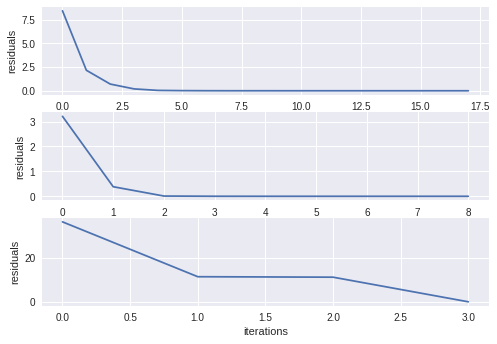


-----------------------------------------------------------------------
---------------------------SYSTEM n° 2---------------------------------
-----------------------------------------------------------------------

JACOBI ITERATION
> solution after 1000 iterations 
> x = [[0. 0. 0.]] 
> ||x - correctSolution || = 1.7321 

GAUSS-SEIDEL ITERATION
> solution after 22 iterations 
> x = [[1. 1. 1.]] 
> ||x - correctSolution || = 2.7772e-10 

GMRES ITERATION
> solution after 1 iterations 
> x = [[1. 1. 1.]] 
> ||x - correctSolution || = 3.8459e-16 



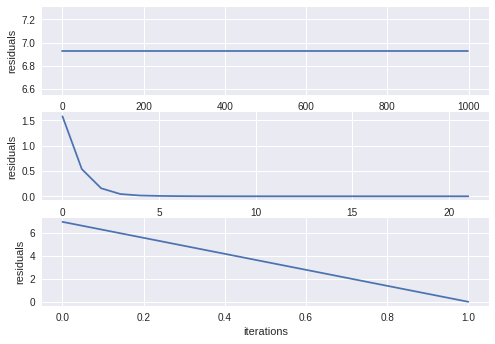


-----------------------------------------------------------------------
---------------------------SYSTEM n° 3---------------------------------
-----------------------------------------------------------------------

JACOBI ITERATION
> solution after 29 iterations 
> x = [[1. 1. 1.]] 
> ||x - correctSolution || = 9.7566e-11 

GAUSS-SEIDEL ITERATION
> solution after 1000 iterations 
> x = [[0.89473684 0.05263158 1.31578947]] 
> ||x - correctSolution || = 1.0041 

GMRES ITERATION
> solution after 3 iterations 
> x = [[1. 1. 1.]] 
> ||x - correctSolution || = 6.4737e-16 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in long_scalars


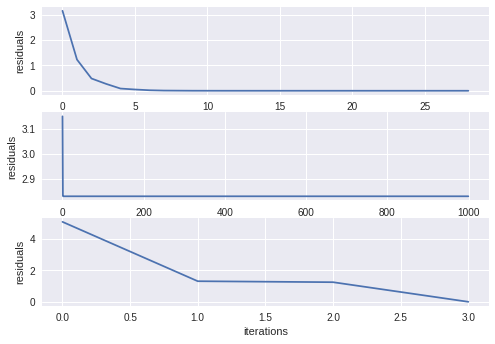


-----------------------------------------------------------------------
---------------------------SYSTEM n° 4---------------------------------
-----------------------------------------------------------------------

JACOBI ITERATION
> solution after 105 iterations 
> x = [[ 2.30000000e+01  2.70000000e+01  1.20000000e+01 -2.53871413e-09]] 
> ||x - correctSolution || = 6.9322e-09 

GAUSS-SEIDEL ITERATION
> solution after 52 iterations 
> x = [[ 2.3000000e+01  2.7000000e+01  1.2000000e+01 -1.5262307e-09]] 
> ||x - correctSolution || = 5.8473e-09 

GMRES ITERATION
> solution after 4 iterations 
> x = [[2.30000000e+01 2.70000000e+01 1.20000000e+01 5.32907052e-15]] 
> ||x - correctSolution || = 2.7804e-14 



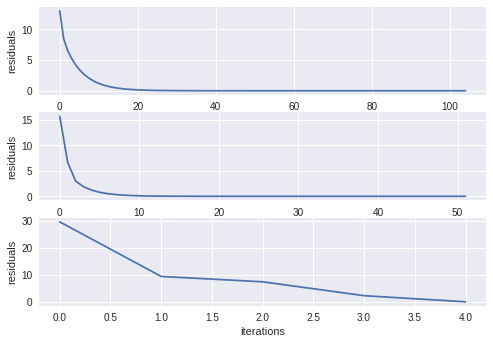

In [8]:
def printSolution(method, correctSolution, sol):
  t= method + '\n'
  t+= '> solution after {} iterations \n'.format(sol[3])
  if sol[0] is not None:
    t+= '> x = {} \n'.format(sol[0].T)
    res = np.linalg.norm(correctSolution - sol[0])
    t+= '> ||x - correctSolution || = {:.5} \n'.format(res)
  else:
    t+= '> x = {} \n'.format(sol[0])
    

  if sol[1] is not None:
    plt.plot([x for x in range(0,len(sol[1]))],sol[1])
    plt.xlabel('iterations')
    plt.ylabel('residuals')
  
  print(t)
  
print('\n-----------------------------------------------------------------------')
print('---------------------------SYSTEM n° 1---------------------------------')
print('-----------------------------------------------------------------------\n')

A1= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b1= [[19],
     [ 3],
     [31]]

startingPoint= [[0],[0],[0]]
corSol= [[1],
         [2],
         [3]]

plt.figure()
plt.subplot(3,1,1)
printSolution('JACOBI ITERATION', corSol, jacobiIteration(A1, b1, startingPoint, tol= 1e-10))

plt.subplot(3,1,2)
printSolution('GAUSS-SEIDEL ITERATION', corSol, gaussSeidelIteration(A1, b1, startingPoint , tol= 1e-10))
            
plt.subplot(3,1,3)
printSolution('GMRES ITERATION', corSol, GMRESiteration(A1, b1, tol=1e-10))

plt.show()


print('\n-----------------------------------------------------------------------')
print('---------------------------SYSTEM n° 2---------------------------------')
print('-----------------------------------------------------------------------\n')

A2= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b2= [[ 4],
     [ 4],
     [ 4]]

startingPoint= [[0],[0],[0]]

corSol= [[1],
         [1],
         [1]]


plt.figure()
plt.subplot(3,1,1)
printSolution('JACOBI ITERATION', corSol, jacobiIteration(A2, b2, startingPoint, tol= 1e-10))

plt.subplot(3,1,2)
printSolution('GAUSS-SEIDEL ITERATION', corSol, gaussSeidelIteration(A2, b2, startingPoint , tol= 1e-10))
            
plt.subplot(3,1,3)
printSolution('GMRES ITERATION', corSol, GMRESiteration(A2, b2, tol=1e-10))

plt.show()


print('\n-----------------------------------------------------------------------')
print('---------------------------SYSTEM n° 3---------------------------------')
print('-----------------------------------------------------------------------\n')

A3= [[ 3,  0,  1],
     [-1, -1,  3],
     [1,   2,  0]]

b3= [[4],
     [1],
     [3]]

startingPoint= [[0],[0],[0]]

corSol= [[1],
         [1],
         [1]]


plt.figure()
plt.subplot(3,1,1)
printSolution('JACOBI ITERATION', corSol, jacobiIteration(A3, b3, startingPoint, tol= 1e-10))

plt.subplot(3,1,2)
printSolution('GAUSS-SEIDEL ITERATION', corSol, gaussSeidelIteration(A3, b3, startingPoint , tol= 1e-10))
            
plt.subplot(3,1,3)
printSolution('GMRES ITERATION', corSol, GMRESiteration(A3, b3, tol=1e-10))

plt.show()

print('\n-----------------------------------------------------------------------')
print('---------------------------SYSTEM n° 4---------------------------------')
print('-----------------------------------------------------------------------\n')

A4= [[ 2, -1 ,  0,  0],
     [-1,  2,  -1,  0],
     [ 0, -1,   2, -1],
     [ 0,  0,  -1,  2]]

b4= [[ 19],
     [ 19],
     [ -3],
     [-12]]

startingPoint= [[0],[0],[0],[0]]

corSol= [[ 23],
         [ 27],
         [ 12],
         [  0]]


plt.figure()
plt.subplot(3,1,1)
printSolution('JACOBI ITERATION', corSol, jacobiIteration(A4, b4, startingPoint, tol= 1e-10))

plt.subplot(3,1,2)
printSolution('GAUSS-SEIDEL ITERATION', corSol, gaussSeidelIteration(A4, b4, startingPoint , tol= 1e-10))
            
plt.subplot(3,1,3)
printSolution('GMRES ITERATION', corSol, GMRESiteration(A4, b4, tol=1e-10))

plt.show()



## Nonlinear equations and systems of nonlinear equations
In order to test the ```newtonScalarNLeq``` function defined in the above section, some exercises taken from [13, 14] have been used.

1. $f(x) = x - \sqrt{x+3} = 0 \qquad \qquad \qquad x = \dfrac{1 \pm \sqrt{13}}{2}$

2. $f(x) = 2^x -3 = 0 \qquad \qquad \qquad \qquad x = \dfrac{\log 3}{\log 2}$

3. $f(x)= e^x -x -2 = 0 \qquad \qquad \qquad x \approx -1.84141 \vee x \approx 1.14619$ (solution calculated with [Wolfram Alpha](https://www.wolframalpha.com/input/?i=e%5Ex-x-2+%3D+0))




-----------------------------------------------------------------------
-------------------------EQUATION n° 1---------------------------------
-----------------------------------------------------------------------

derivative computed automatically
Solution after 4 iterations 
> x = 2.302785403994 
> f(x=2.3028)= 7.6e-06 
> ||x - correctSolution || = 9.7663e-06 
> res= [3.00000000e+00 1.35426390e+00 2.14669528e-02 7.64572161e-06]


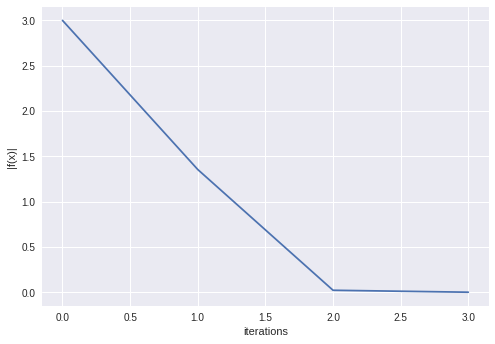


derivative given as input
Solution after 4 iterations 
> x = 2.3027854044745224 
> f(x=2.3028)= 7.6e-06 
> ||x - correctSolution || = 9.7667e-06 
> res= [3.00000000e+00 1.35424869e+00 2.14665639e-02 7.64609780e-06]


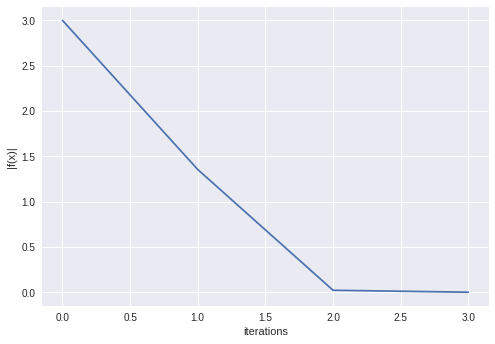


-----------------------------------------------------------------------
-------------------------EQUATION n° 2---------------------------------
-----------------------------------------------------------------------

derivative computed automatically
Solution after 5 iterations 
> x = 1.584964752651281 
> f(x=1.585)= 4.7e-06 
> ||x - correctSolution || = 2.2519e-06 
> res= [5.00000000e+00 1.28262715e+00 1.74439827e-01 4.73930491e-03
 4.68276070e-06]


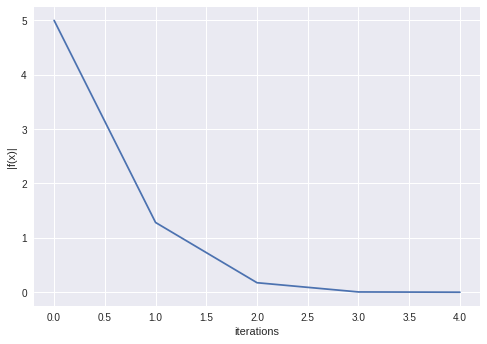


derivative given as input
Solution after 13 iterations 
> x = 1.5849665380189424 
> f(x=1.585)= 8.4e-06 
> ||x - correctSolution || = 4.0373e-06 
> res= [5.00000000e+00 2.18735822e+00 8.72671312e-01 3.12655414e-01
 1.02875968e-01 3.23809180e-02 1.00190359e-02 3.08237457e-03
 9.46595168e-04 2.90537119e-04 8.91588927e-05 2.73592941e-05
 8.39533648e-06]


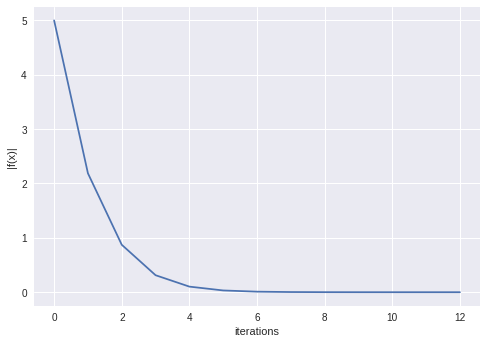


-----------------------------------------------------------------------
-------------------------EQUATION n° 3---------------------------------
-----------------------------------------------------------------------

derivative computed automatically
Solution after 3 iterations 
> x = -1.8414059002841576 
> f(x=-1.8414)= 2e-07 
> ||x - correctSolution || = 4.0997e-06 
> res= [1.35335283e-01 1.73909265e-03 2.01808794e-07]


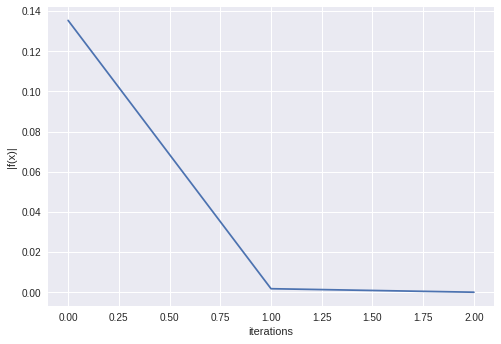


derivative given as input
Solution after 3 iterations 
> x = -1.8414060661579263 
> f(x=-1.8414)= 3.4e-07 
> ||x - correctSolution || = 3.9338e-06 
> res= [1.35335283e-01 1.74768620e-03 3.41375930e-07]


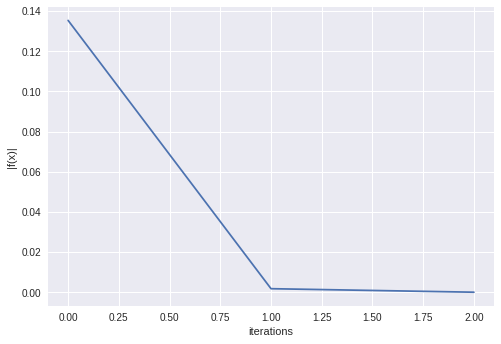

In [9]:
def printSolutionScalarEquation(fun, cs, sol):
  t= 'Solution after {} iterations \n'.format(sol[2])
  t+= '> x = {} \n'.format(sol[0])
  t+= '> f(x={:.5})= {:.2} \n'.format(sol[0], fun(sol[0]))
  res = np.linalg.norm(cs - sol[0])
  t+= '> ||x - correctSolution || = {:.5} \n'.format(res)
  t+= '> res= {}'.format(sol[1])
  print(t)
  
  plt.figure()
  plt.plot([x for x in range(0,len(sol[1]))],sol[1])
  plt.xlabel('iterations')
  plt.ylabel('|f(x)|')

  plt.show()
  

print('\n-----------------------------------------------------------------------')
print('-------------------------EQUATION n° 1---------------------------------')
print('-----------------------------------------------------------------------\n')

        
def f1(x):
  return x - np.sqrt(x+3)

def derf1(x):
  return 1 - 1 / (2*np.sqrt(x+3))

correctSolution= (1+math.sqrt(13))/2

print('derivative computed automatically')
printSolutionScalarEquation(f1, correctSolution, newtonScalarNLeq(f1, -2, h=0.005))

print()
print('derivative given as input')
printSolutionScalarEquation(f1, correctSolution, newtonScalarNLeq(f1, -2, der= derf1, h=0.005))
      
print('\n-----------------------------------------------------------------------')
print('-------------------------EQUATION n° 2---------------------------------')
print('-----------------------------------------------------------------------\n')


def f2(x):
  return 2**x - 3

def derf2(x):
  return 2**x

correctSolution= np.log(3)/np.log(2)

print('derivative computed automatically')
printSolutionScalarEquation(f2, correctSolution, newtonScalarNLeq(f2, 3, h=0.05))

print()
print('derivative given as input')
printSolutionScalarEquation(f2, correctSolution, newtonScalarNLeq(f2, 3, der= derf2, h=0.05))
        
print('\n-----------------------------------------------------------------------')
print('-------------------------EQUATION n° 3---------------------------------')
print('-----------------------------------------------------------------------\n')


        
def f3(x):
  return np.e**x -x - 2

def derf3(x):
  return np.e**x - 1

correctSolution= -1.84141

print('derivative computed automatically')
printSolutionScalarEquation(f3, correctSolution, newtonScalarNLeq(f3, -2, h=0.05))

print()
print('derivative given as input')
printSolutionScalarEquation(f3, correctSolution, newtonScalarNLeq(f3, -2, der= derf3, h=0.05))

In order to test the ```newtonNLsystems``` function defined in the above section, some exercises taken from [15] have been used.

1. $\begin{cases}
 f_1(x,y) = e^{2x} - y = 0\\
 f_2(x,y) = 2e^x - 1 -y = 0
\end{cases} \qquad \qquad \qquad (x,y) = (0,1)
$ (solution calculated with Wolfram Alpha)

2. $
\begin{cases}
 f_1(x,y,z) = xy +2 y = 0\\
 f_2(x,y,z) = x + y = 0 \\
 f_3(x,y,z)= y(z+1) - 10 = 0
\end{cases} \qquad \qquad \qquad (x,y,z) = \left(-2,2,4\right)
$ (solution calculated with Wolfram Alpha)



-----------------------------------------------------------------------
---------------------------SYSTEM n° 1---------------------------------
-----------------------------------------------------------------------

Jacobian automatically computed
Solution after 15 iterations 
> x = [[0.00230099 1.00460535]] 
> f(x=[[0.00230099 1.00460535]])= [[7.23326425e-06 1.92651768e-06]] 
> ||x - correctSolution || = 0.0051482 
> res= [7.25465420e+00 1.24298623e+00 4.34849712e-01 1.46327596e-01
 4.67911380e-02 1.42538191e-02 4.23550938e-03 1.28042652e-03
 4.15407884e-04 1.52348662e-04 6.50738844e-05 3.22707849e-05
 1.81340975e-05 1.12285810e-05 7.48542465e-06]


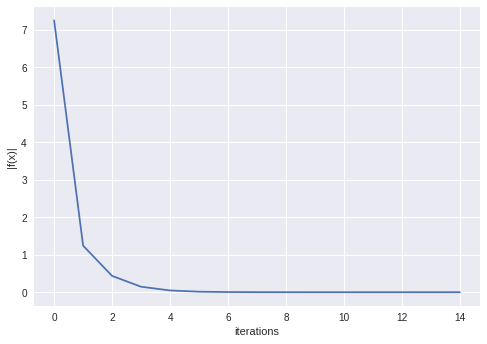


Jacobian given as input
Solution after 12 iterations 
> x = [[0.00130874 1.00261749]] 
> f(x=[[0.00130874 1.00261749]])= [[3.42264253e-06 1.70759618e-06]] 
> ||x - correctSolution || = 0.0029264 
> res= [7.25465420e+00 1.23332377e+00 4.26239427e-01 1.40962167e-01
 4.38641787e-02 1.27698222e-02 3.50966510e-03 9.26101127e-04
 2.38349599e-04 6.04940051e-05 1.52404485e-05 3.82496622e-06]


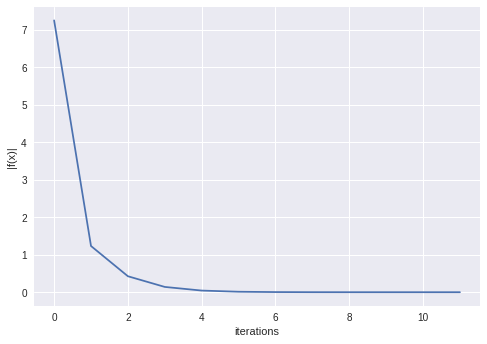


-----------------------------------------------------------------------
---------------------------SYSTEM n° 2---------------------------------
-----------------------------------------------------------------------

Jacobian automatically computed
Solution after 3 iterations 
> x = [[-2.  2.  4.]] 
> f(x=[[-2.  2.  4.]])= [[1.33226763e-15 1.11022302e-15 3.19744231e-14]] 
> ||x - correctSolution || = 1.512e-14 
> res= [1.00000000e+01 8.00000000e+00 3.20214189e-14]


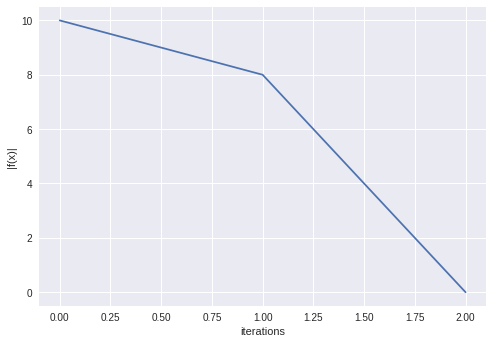


Jacobian given as input
Solution after 3 iterations 
> x = [[-2.  2.  4.]] 
> f(x=[[-2.  2.  4.]])= [[8.88178420e-16 2.22044605e-16 0.00000000e+00]] 
> ||x - correctSolution || = 1.0175e-15 
> res= [1.0000000e+01 8.0000000e+00 9.1551336e-16]


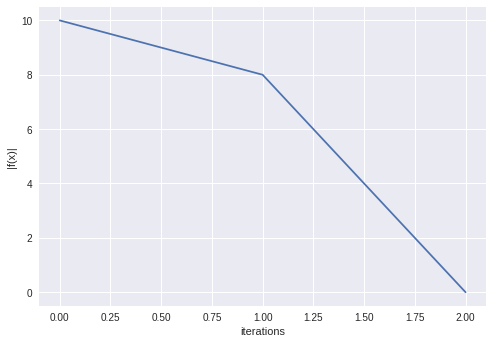

In [10]:
def printSolutionScalarEquation(fun, cs, sol):
  t= 'Solution after {} iterations \n'.format(sol[2])
  t+= '> x = {} \n'.format(sol[0].T)
  t+= '> f(x={})= {:} \n'.format(sol[0].T, fun(sol[0]).T)
  res = np.linalg.norm(cs - sol[0])
  t+= '> ||x - correctSolution || = {:.5} \n'.format(res)
  t+= '> res= {}'.format(sol[1])
  print(t)
  plt.figure()
  plt.plot([x for x in range(0,len(sol[1]))],sol[1])
  plt.xlabel('iterations')
  plt.ylabel('|f(x)|')

  plt.show()


print('\n-----------------------------------------------------------------------')
print('---------------------------SYSTEM n° 1---------------------------------')
print('-----------------------------------------------------------------------\n')


def funVect1(var):
  if not isinstance(var,np.ndarray):
    var= np.array(var)

  fun1= np.e**(2*var[0]) - var[1]
  fun2= 2*np.e**var[0] - 1 -var[1]
  
  vect= [fun1,
         fun2]
  vect= np.array(vect)
  return vect

def derFunVect1(var):
  if not isinstance(var,np.ndarray):
    var= np.array(var)

  vect= [[2*np.e**(2*var[0]), -1],
         [2*np.e**var[0],     -1]]
  vect= np.array(vect)
  return vect

startingPoint= [[1], 
                [1]]

correctSolution = [[0],
                   [1]]

print('Jacobian automatically computed')
printSolutionScalarEquation(funVect1, correctSolution, newtonNLsystems(funVect1, startingPoint))

print()
print('Jacobian given as input')
printSolutionScalarEquation(funVect1, correctSolution, newtonNLsystems(funVect1, startingPoint, J=derFunVect1))
  
  
  
print('\n-----------------------------------------------------------------------')
print('---------------------------SYSTEM n° 2---------------------------------')
print('-----------------------------------------------------------------------\n')
  
def funVect2(var):
  if not isinstance(var,np.ndarray):
    var= np.array(var)
  
  fun1= var[0]*var[1] + 2*var[1]
  fun2= var[0] + var[1]
  fun3= var[1]*(var[2]+1) -10
  
  vect= [fun1,
         fun2,
         fun3]
  vect= np.array(vect)
  return vect

def derFunVect2(var):
  if not isinstance(var,np.ndarray):
    var= np.array(var)
    
  vect= [[var[1], var[0]+2,      0],
         [     1,        1,      0],
         [     0, var[2]+1, var[1]]]
  vect= np.array(vect)
  return vect

startingPoint= [[ 0],
                [ 0],
                [ 0]]

correctSolution= [[-2],
                  [ 2],
                  [ 4]]

print('Jacobian automatically computed')
printSolutionScalarEquation(funVect2, correctSolution, newtonNLsystems(funVect2, startingPoint))

print()
print('Jacobian given as input')
printSolutionScalarEquation(funVect2, correctSolution, newtonNLsystems(funVect2, startingPoint, J=derFunVect2))

# **Discussion**

From the tests done in the previous section, we can observe that Jacobi iteration, Guass-Seidel iteration and GMRES iteration are quite different from each other. In fact, the method which seems the most robust is GMRES since it never failed the tests. Even though the other two algorithms cannot reach the convergence, GMRES reaches the convergence very quicly. 

Another important thing is that Jacobi is the slowest algorithm among these three, because it needs always more iterations than the others. 

About the Newton's method for nonlinear equation and for systems of nonlinear equations, we can say that these algorithms work well both with and without the Jacobian given as input. Unlikely, these methods depend particularly on the initial guess for the solution: in fact, a wrong initial guess for the solution might make the algorithm not converge to the solution. An improvement could be to limit the research of the solution in a certain interval, but we would need to know at least an approximation of the solution in order to limit the research.

In conclusion, when we use these algorithms, we need to be sure that our input (linear system, nonlinear equation or system of nonlinear equations) allows the algorithm used for the purpose to converge to the solution, otherwise the algorithm would diverge more and more.

# References

[1] from Lecture Notes, *Iterative methods, chapter 7*, pg. 93

[2] from Wikipedia, *[Jacobi method](https://en.wikipedia.org/wiki/Jacobi_method)*

[3] from Wikipedia, *[Gauss-Seidel method](https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method)*

[4] from Lecture Notes, *Gauss-Seidel iteration, chapter 7*, pg. 99

[5] from Wikipedia, *[Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)*

[6] from Lecture Notes, *Nonlinear scalar equation, chapter 8*, pg. 108

[7] from Lecture Notes, *Newton's method, algorithm 13, chapter 8*, pg. 111

[8] from Wikipedia, *[Generalized minimal residual method](https://en.wikipedia.org/wiki/Generalized_minimal_residual_method)*

[9] from Lecture Notes, *GMRES, chapter 7*, pg 100

[10] from Lecture Notes, *Arnoldi iteration, algorithm 9*, pg. 101

[11] from Lecture Notes, *GMRES, algorithm 10*, pg. 101

[12] *[Exercises](https://s-mat-pcs.oulu.fi/~mpa/matreng/et55_60.htm)*

[13] *[Exercises](http://www.maths.lth.se/na/courses/FMN050/media/material/Exercise_1.pdf)*

[14] *[Exercises](https://ask.fxplus.ac.uk/tools/HELM/pages/workbooks_1_50_jan2008/Workbook31/31_4_non_lin_eqns.pdf)*

[15] *[Exercises](https://www.cos.edu/Faculty/jonb/Documents/13.4.pdf)*